In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [3]:
df = pd.read_csv("C:\\Users\\Raju A S\\Downloads\\Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


# Check Missing Value

In [4]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
object_cols = df.dtypes == 'object'
data_cols = list(object_cols[object_cols].index)
data_cols

['type', 'nameOrig', 'nameDest']

In [7]:
numeric_cols = (df.dtypes != 'object')
data_num = list(numeric_cols[numeric_cols].index)
data_num

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

D:\Users\Raju A S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

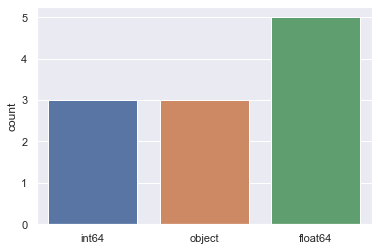

In [8]:
sns.countplot(df.dtypes.map(str))

# Univariant Analysis

In [9]:
df.type= df.type.str.strip().str.lower()

In [10]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


D:\Users\Raju A S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\Raju A S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldbalanceOrg', ylabel='Density'>

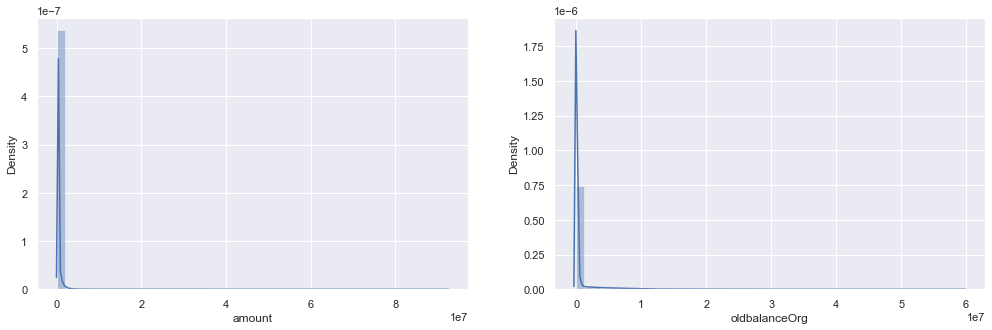

In [11]:
f = plt.figure(figsize=(17,5))

ax = f.add_subplot(121)
sns.distplot(df.amount)

ax = f.add_subplot(122)
sns.distplot(df.oldbalanceOrg)

D:\Users\Raju A S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Users\Raju A S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='oldbalanceDest', ylabel='Density'>

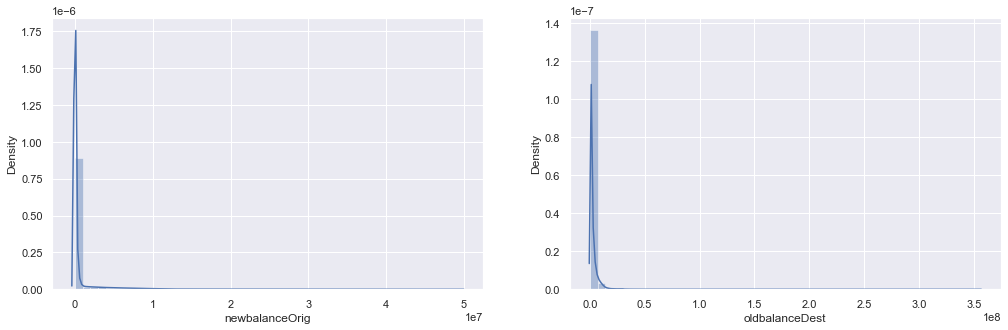

In [12]:
f = plt.figure(figsize=(17,5))

ax = f.add_subplot(121)
sns.distplot(df.newbalanceOrig)

ax = f.add_subplot(122)
sns.distplot(df.oldbalanceDest)

D:\Users\Raju A S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

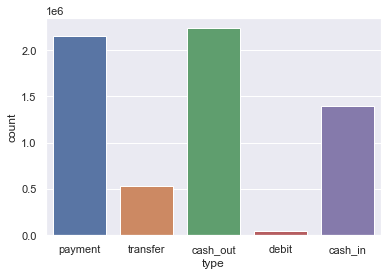

In [13]:
sns.countplot(df.type)

D:\Users\Raju A S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\Users\Raju A S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFlaggedFraud', ylabel='count'>

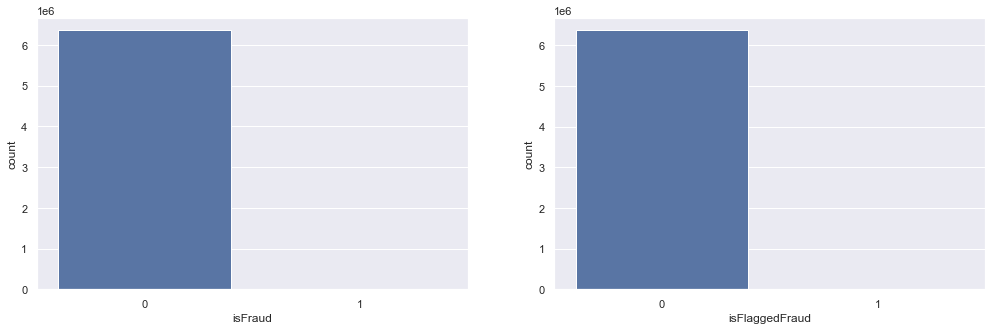

In [14]:
f = plt.figure(figsize=(17,5))

ax = f.add_subplot(121)
sns.countplot(df.isFraud)

ax = f.add_subplot(122)
sns.countplot(df.isFlaggedFraud)

# Bivariant Analysis

<AxesSubplot:>

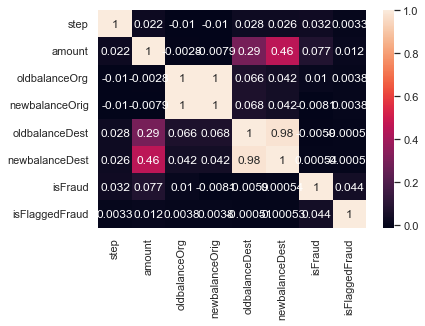

In [15]:
sns.heatmap(df.corr(), annot=True)

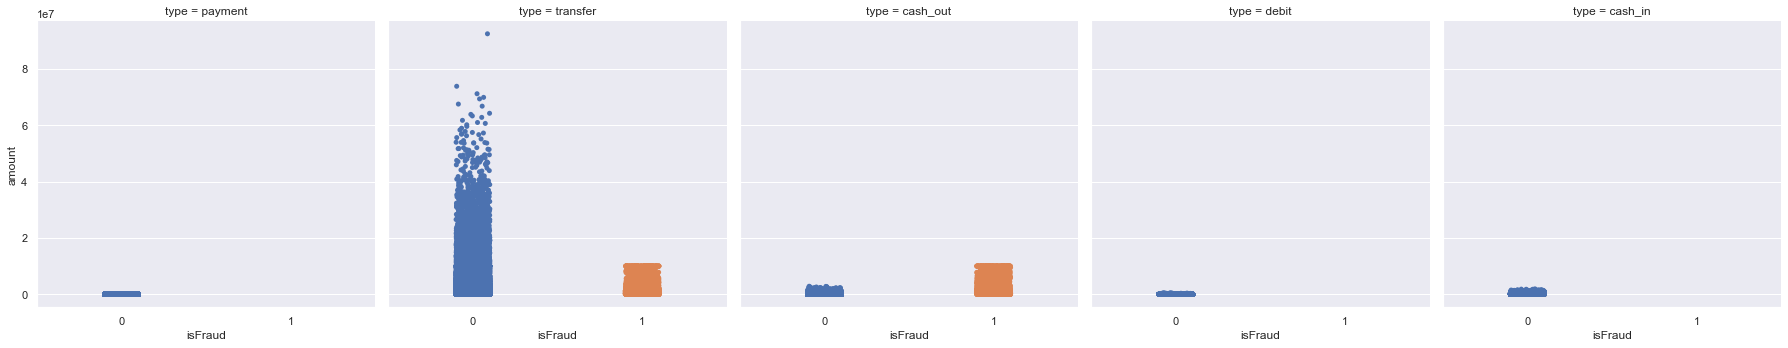

In [16]:
sns.catplot(x="isFraud", y="amount", col="type", data=df)

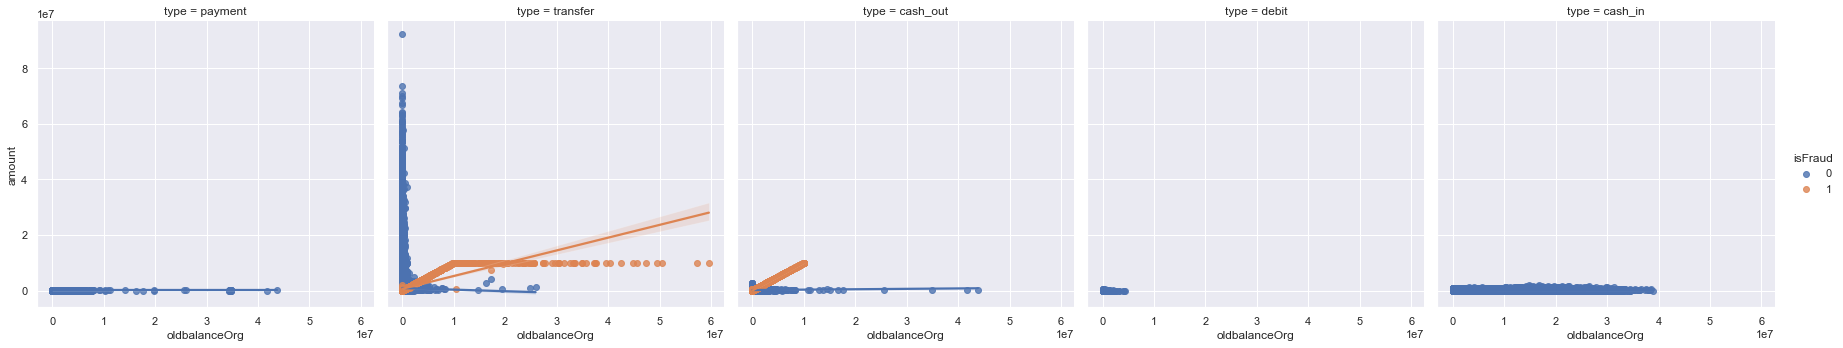

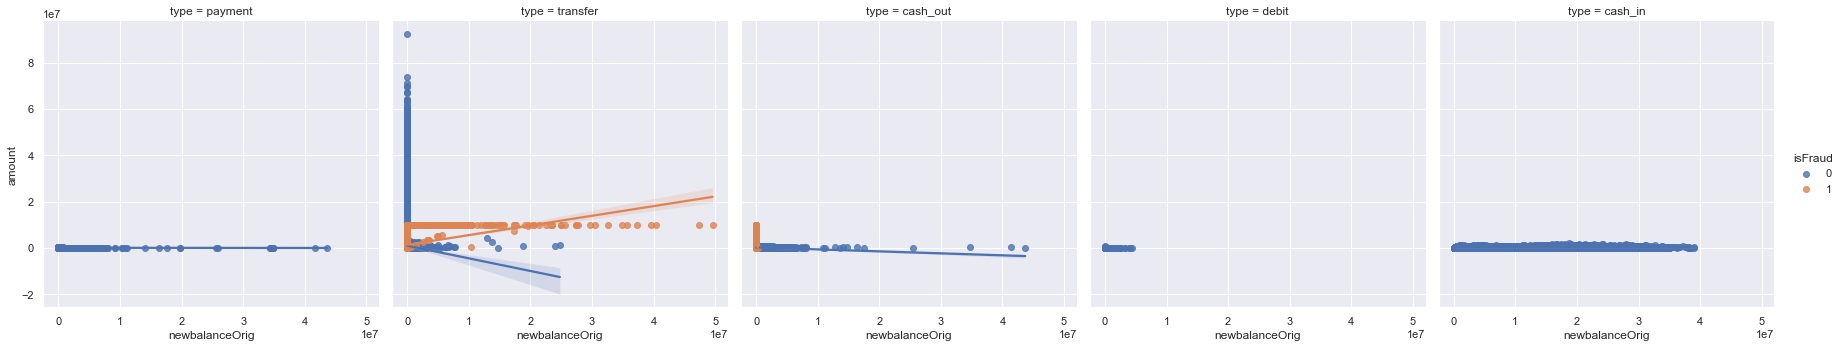

In [17]:
sns.lmplot(x="oldbalanceOrg", y="amount", hue="isFraud", col="type", data=df)
sns.lmplot(x="newbalanceOrig", y="amount", hue="isFraud", col="type", data=df)

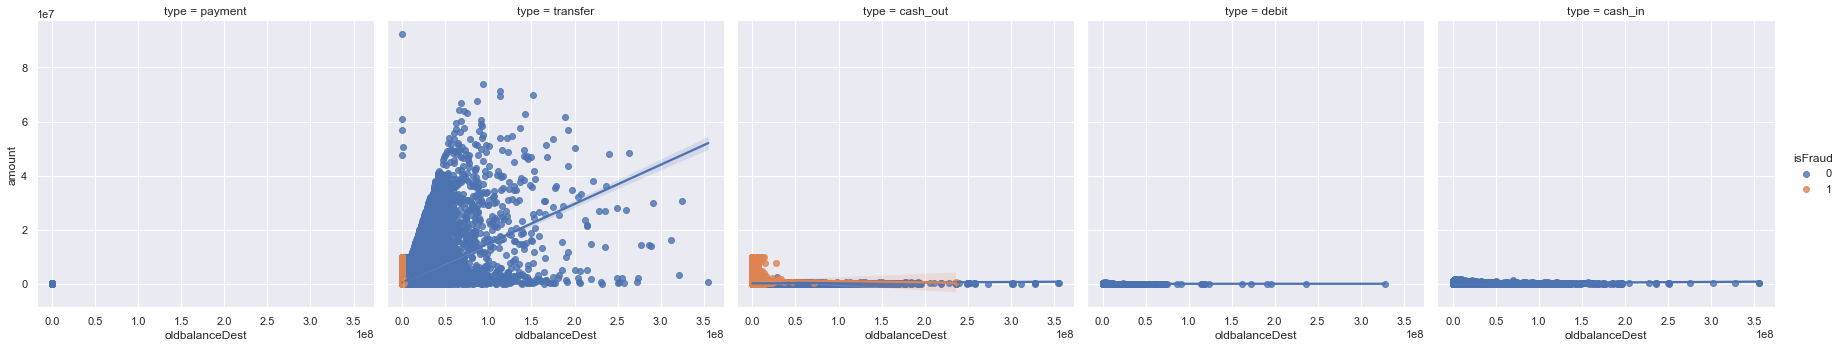

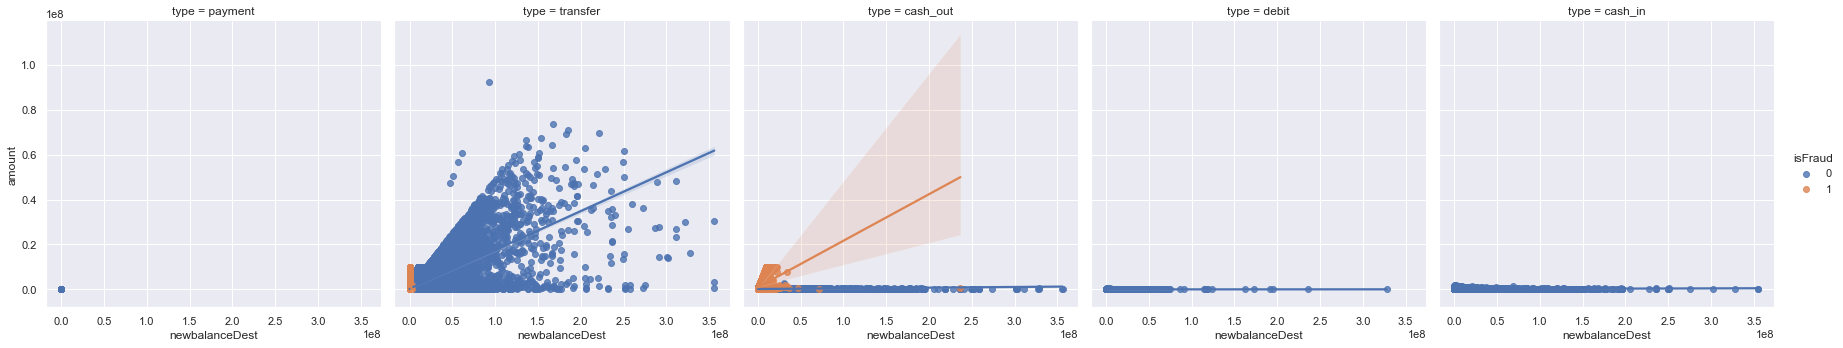

In [18]:
sns.lmplot(x="oldbalanceDest", y="amount", hue="isFraud", col="type", data=df)
sns.lmplot(x="newbalanceDest", y="amount", hue="isFraud", col="type", data=df)

We will take look at the highest transaction for both fraud and normal transaction

In [19]:
df[df['isFraud'] == 0]['amount'].nlargest(10)

3686583    92445516.64
4060598    73823490.36
4146397    71172480.42
3946920    69886731.30
3911956    69337316.27
3937152    67500761.29
4105338    66761272.21
3892529    64234448.19
3991638    63847992.58
4143801    63294839.63
Name: amount, dtype: float64

In [20]:
df[df['isFraud'] == 1]['amount'].nlargest(10)

4440       10000000.0
4441       10000000.0
481250     10000000.0
481251     10000000.0
586311     10000000.0
586312     10000000.0
1030559    10000000.0
1030560    10000000.0
1030661    10000000.0
1030662    10000000.0
Name: amount, dtype: float64

In [21]:
fraud = df[df['isFraud'] == 1]['amount'].max()
not_fraud = df[df['isFraud'] == 0]['amount'].max()

print("Highest amount for fraud transaction:", fraud)
print("Highest amount for noraml transaction:", not_fraud)

print("\nHigest Fraud Transaction is", fraud - not_fraud, "times more than the highest normal transaction")

Highest amount for fraud transaction: 10000000.0
Highest amount for noraml transaction: 92445516.64

Higest Fraud Transaction is -82445516.64 times more than the highest normal transaction


In [24]:
df[df['amount'] == fraud]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4440,4,transfer,10000000.0,C7162498,12930418.44,2930418.44,C945327594,0.00,0.00,1,0
4441,4,cash_out,10000000.0,C351297720,10000000.00,0.00,C766681183,0.00,9941904.21,1,0
481250,19,transfer,10000000.0,C416779475,11861008.32,1861008.32,C380259496,0.00,0.00,1,0
481251,19,cash_out,10000000.0,C2050703310,10000000.00,0.00,C1622860679,504326.62,10342417.90,1,0
586311,33,transfer,10000000.0,C1439740840,19887819.06,9887819.06,C875288652,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362579,741,cash_out,10000000.0,C1647199421,10000000.00,0.00,C2077145577,35922.97,10035922.97,1,0
6362580,741,transfer,10000000.0,C88849251,25674547.89,15674547.89,C1939028448,0.00,0.00,1,0
6362581,741,cash_out,10000000.0,C677394894,10000000.00,0.00,C1866259073,0.00,10000000.00,1,0
6362582,741,transfer,10000000.0,C1945606464,15674547.89,5674547.89,C625944676,0.00,0.00,1,0


In [25]:
df[df['amount'] == not_fraud]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3686583,276,transfer,92445516.64,C1715283297,0.0,0.0,C439737079,9595.98,92455112.62,0,0
